<a href="https://colab.research.google.com/github/Timchan000/MLEnd-Yummy-Dataset/blob/main/arima_models(autoarima).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

tesla = pd.read_csv('TSLA.csv')
tesla

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
1,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
3,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
4,2010-07-07,1.093333,1.108667,0.998667,1.053333,1.053333,103825500
...,...,...,...,...,...,...,...
3370,2023-11-17,232.000000,237.389999,226.539993,234.300003,234.300003,142532800
3371,2023-11-20,234.039993,237.100006,231.020004,235.600006,235.600006,116320100
3372,2023-11-21,235.039993,243.619995,233.339996,241.199997,241.199997,122288000
3373,2023-11-22,242.039993,244.009995,231.399994,234.210007,234.210007,117950600


In [ ]:
tesla['Date'] = pd.to_datetime(tesla['Date'])
tesla

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
1,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
3,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
4,2010-07-07,1.093333,1.108667,0.998667,1.053333,1.053333,103825500
...,...,...,...,...,...,...,...
3370,2023-11-17,232.000000,237.389999,226.539993,234.300003,234.300003,142532800
3371,2023-11-20,234.039993,237.100006,231.020004,235.600006,235.600006,116320100
3372,2023-11-21,235.039993,243.619995,233.339996,241.199997,241.199997,122288000
3373,2023-11-22,242.039993,244.009995,231.399994,234.210007,234.210007,117950600


In [ ]:
complete_date_range = pd.date_range(start = '2010-06-30', end = '2023-11-24')

In [ ]:
df_dates = pd.DataFrame(complete_date_range, columns=['Date'])

In [ ]:
df = pd.merge(df_dates, tesla, on='Date', how='left')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500.0
1,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000.0
2,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000.0
3,2010-07-03,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-07-04,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
4891,2023-11-20,234.039993,237.100006,231.020004,235.600006,235.600006,116320100.0
4892,2023-11-21,235.039993,243.619995,233.339996,241.199997,241.199997,122288000.0
4893,2023-11-22,242.039993,244.009995,231.399994,234.210007,234.210007,117950600.0
4894,2023-11-23,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

for column in columns:
    df[column].interpolate(method='linear', inplace=True)

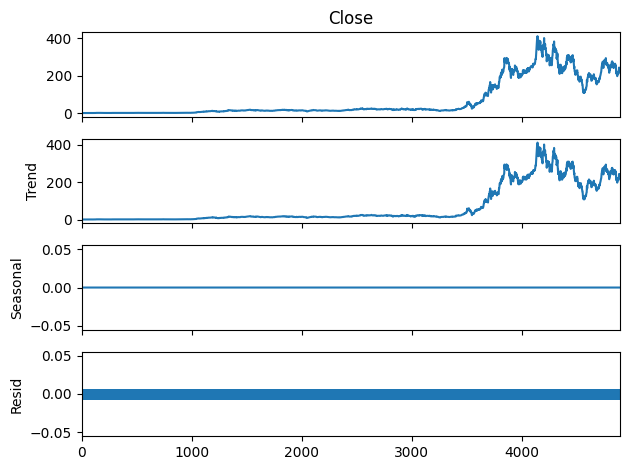

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['Close'], model='additive', period=1)

result.plot()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
data=df['Close']
data_rolling_mean = data.rolling(window=30).mean().fillna(0)

train_data, test_data = train_test_split(data_rolling_mean, train_size=0.7, shuffle=False)

print("Train set length:", len(train_data))
print("Test set length:", len(test_data))

Train set length: 3427
Test set length: 1469


In [ ]:
! pip install pmdarima
import pandas as pd
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
auto_model = auto_arima(train_data, start_p=0, start_q=0,
                        test='adf',
                        max_p=5, max_q=5,
                        m=1,
                        d=None,
                        seasonal=False,
                        start_P=0,
                        D=0,
                        trace=True,
                        error_action='ignore',
                        suppress_warnings=True,
                        stepwise=False)

print(auto_model.summary())

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-9386.732, Time=0.91 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-11335.354, Time=1.85 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-12253.238, Time=2.72 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-12773.883, Time=5.23 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=-13092.126, Time=5.21 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=-13326.025, Time=5.26 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-13543.169, Time=0.22 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-14064.588, Time=4.20 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-14064.205, Time=4.53 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-14062.676, Time=2.76 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-14060.906, Time=3.84 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-13975.310, Time=2.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-14063.973, Time=3.09 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-14062.283, Time=2.71 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-14060.

In [ ]:
#auto_model = auto_arima(train_data, trace=True,suppress_warnings=True)


#print(auto_model.summary())

In [ ]:
auto_model.order

(1, 1, 1)

In [ ]:
model = ARIMA(train_data, order=auto_model.order)
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


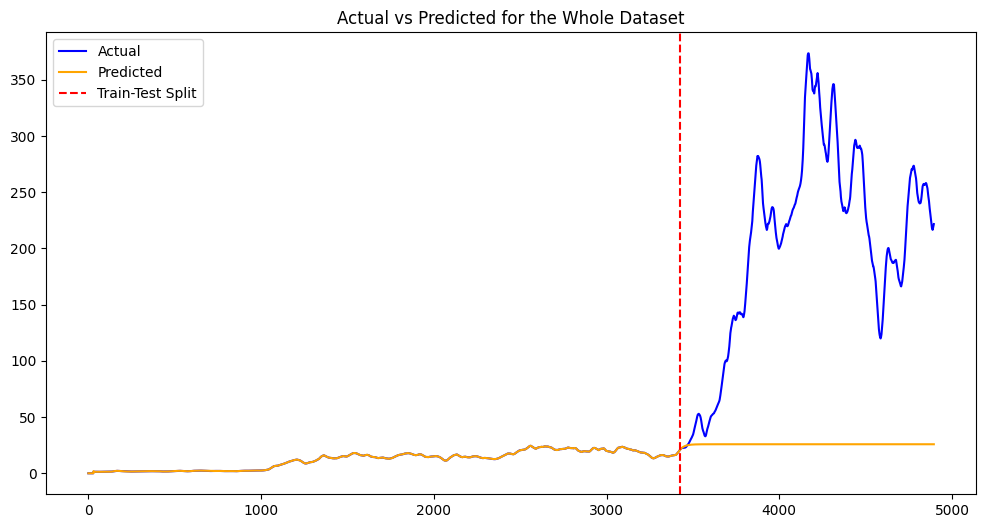

In [ ]:
full_dataset_pred = model_fit.predict(start=0, end=len(data_rolling_mean)-1, typ='levels')

plt.figure(figsize=(12, 6))
plt.plot(data_rolling_mean, label='Actual', color='blue')
plt.plot(full_dataset_pred, label='Predicted', color='orange')
plt.axvline(x=len(train_data), color='r', linestyle='--', label='Train-Test Split')
plt.legend()
plt.title('Actual vs Predicted for the Whole Dataset')
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
mae_train = mean_absolute_error(data_rolling_mean[:len(train_data)], full_dataset_pred[:len(train_data)])
mae_test = mean_absolute_error(data_rolling_mean[len(train_data):], full_dataset_pred[len(train_data):])

print('The MAE for train is',mae_train)
print('The MAE for test is',mae_test)

The MAE for train is 0.011636454873222513
The MAE for test is 174.66193378385069


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mse_train = mean_squared_error(data_rolling_mean[:len(train_data)], full_dataset_pred[:len(train_data)])
mse_test = mean_squared_error(data_rolling_mean[len(train_data):], full_dataset_pred[len(train_data):])

print('The MSE for train is',mse_train)
print('The MSE for test is',mse_test)

The MSE for train is 0.0009626061481442832
The MSE for test is 38808.23814661593


In [ ]:
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

print('The RMSE for train is', rmse_train)
print('The RMSE for test is', rmse_test)

The RMSE for train is 0.031025894800058275
The RMSE for test is 196.99806635247953
